In [6]:
import os, glob, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data_folder = r"D:\Analyzed_CellBio\Stam\Lac_Ms_live\MS2_Compiled_analysis\controls"

control_files = [f for f in glob.glob(data_folder + os.sep +'*') if 'analysis_control' in f]

control_df = [pd.read_excel(f, index_col = None) for f in control_files]

In [8]:
#control_files

In [9]:
_test = True


normalized_measurement_dict_list = []
normalized_measurement_df_list = []

lac_based_ms2 = []
std_based_ms2 = []

if _test:
    
    for index, df in enumerate(control_df[:]):
        
        
        print(f'--processing dataframe #{index}.')
        all_timepoints = df.columns
        
        mitosis_timepoints = []
        for _t in all_timepoints:
            if df[_t][0] == 'mitosis':
                mitosis_timepoints.append(_t)
        
        mitosis_start = int(mitosis_timepoints [0])
        mitosis_end = int(mitosis_timepoints [-1])
        
        normalized_measurement_dict = {}
        
        for _t in all_timepoints:
            
            _ori_time = int(_t)
            if _ori_time <mitosis_start:
                _new_time = _ori_time - mitosis_start
            elif _ori_time >mitosis_end:
                _new_time = _ori_time - mitosis_end + 4 # mitosis duration
                
            ms2_value = df[_t][0]
            #print(ms2_value)
            if type(ms2_value) is np.float64:
                normalized_measurement_dict[_new_time] = ms2_value
                
                if _new_time >=5 and _new_time <=60:
                    lac_based_ms2.append(ms2_value)
                
            elif type(ms2_value) is str:
                if 'yes' in ms2_value:
                    ms2_value= np.float64(ms2_value.split('yes_')[1])
                    normalized_measurement_dict[_new_time] = ms2_value
                    
                    if _new_time >=5 and _new_time <=60:
                        std_based_ms2.append(ms2_value)
                    
                elif 'no' in ms2_value:
                    ms2_value=1.7
                    normalized_measurement_dict[_new_time] = ms2_value
                elif 'mitosis' in ms2_value:
                    ms2_value=0
                    normalized_measurement_dict[0] = ms2_value
                    normalized_measurement_dict[1] = ms2_value
                    normalized_measurement_dict[2] = ms2_value
                    normalized_measurement_dict[3] = ms2_value
                    normalized_measurement_dict[4] = ms2_value
            
            # add empty for 200 timpoints in total
            valid_timepoints = normalized_measurement_dict.keys()
            empty_timepoints = [_t for _t in range(-100,100) if _t not in valid_timepoints]
            for _t in empty_timepoints:
                normalized_measurement_dict[_t] = np.nan
                
            normalized_measurement_df = pd.DataFrame(normalized_measurement_dict,index=[0])  
            normalized_measurement_df = normalized_measurement_df[range(-100,100)]
            
        normalized_measurement_dict_list.append(normalized_measurement_dict)
        normalized_measurement_df_list.append(normalized_measurement_df)
                
combined_df = pd.concat(normalized_measurement_df_list)

--processing dataframe #0.
--processing dataframe #1.
--processing dataframe #2.
--processing dataframe #3.
--processing dataframe #4.
--processing dataframe #5.
--processing dataframe #6.
--processing dataframe #7.
--processing dataframe #8.
--processing dataframe #9.
--processing dataframe #10.
--processing dataframe #11.
--processing dataframe #12.
--processing dataframe #13.
--processing dataframe #14.
--processing dataframe #15.
--processing dataframe #16.
--processing dataframe #17.
--processing dataframe #18.
--processing dataframe #19.
--processing dataframe #20.
--processing dataframe #21.
--processing dataframe #22.


In [55]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data =x = norm_std_based_ms2
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.990, p=0.002
Sample does not look Gaussian (reject H0)


In [32]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = std_based_ms2
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=7.852, p=0.020
Sample does not look Gaussian (reject H0)


<IPython.core.display.Javascript object>


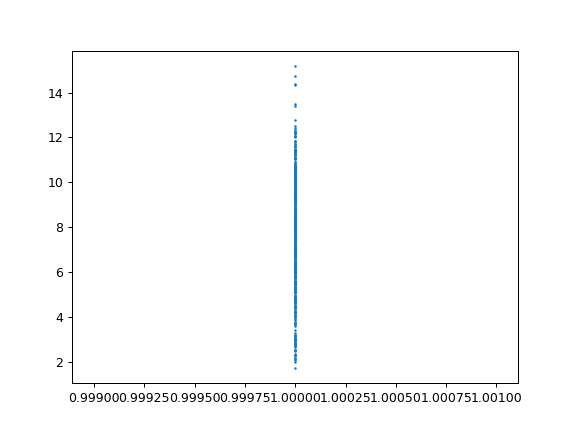

In [30]:
%matplotlib notebook
plt.scatter(x=x,y=std_based_ms2, s=1)

361
477
MW comparision: 1.9872608748104562e-22


<IPython.core.display.Javascript object>


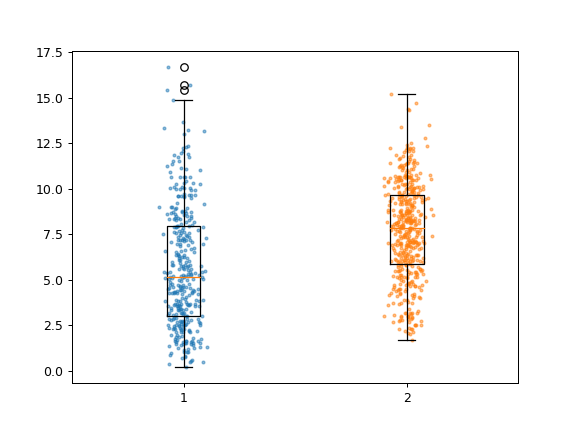

MW comparision: 5.762595294777926e-13


c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


In [69]:
%matplotlib notebook
#plt.boxplot([lac_based_ms2, std_based_ms2])

lac_based_ms2= np.array(lac_based_ms2)
std_based_ms2= np.array(std_based_ms2)


lac_based_ms2 = lac_based_ms2[np.logical_not(np.isnan(lac_based_ms2))]

print(len(lac_based_ms2))

print(len(std_based_ms2))




from scipy.stats import mannwhitneyu
U1, p1 = mannwhitneyu(lac_based_ms2,std_based_ms2)

print(f"MW comparision: {p1}")

vals, xs = [], [] 
plt.boxplot([lac_based_ms2,std_based_ms2])

for i, subdf in enumerate([lac_based_ms2,std_based_ms2]):
    #names.append(name)
    vals.append(subdf)
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 5, alpha=0.5)


    
    
    
lac_based_ms2_filtered = lac_based_ms2[lac_based_ms2>2]
U1, p2 = mannwhitneyu(lac_based_ms2_filtered,std_based_ms2)

print(f"MW comparision: {p2}")

<IPython.core.display.Javascript object>


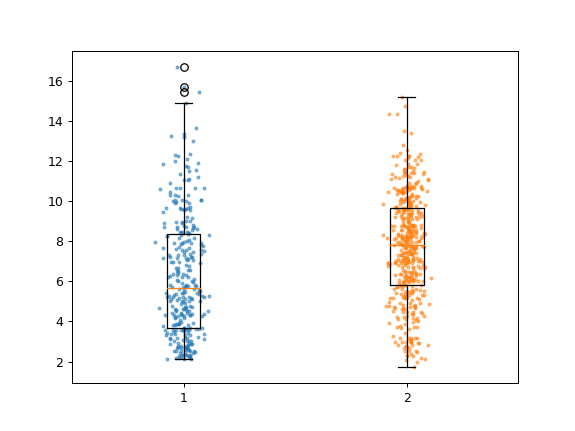

c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


In [70]:
%matplotlib notebook

vals, xs = [], [] 
plt.boxplot([lac_based_ms2_filtered,std_based_ms2])

for i, subdf in enumerate([lac_based_ms2_filtered,std_based_ms2]):
    #names.append(name)
    vals.append(subdf)
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))

for x, val in zip(xs, vals):
    plt.scatter(x, val,  s = 5, alpha=0.5)


In [74]:
np.median(std_based_ms2)


np.median(std_based_ms2) - 2*stats.median_absolute_deviation(std_based_ms2)

2.312609028683207

<IPython.core.display.Javascript object>


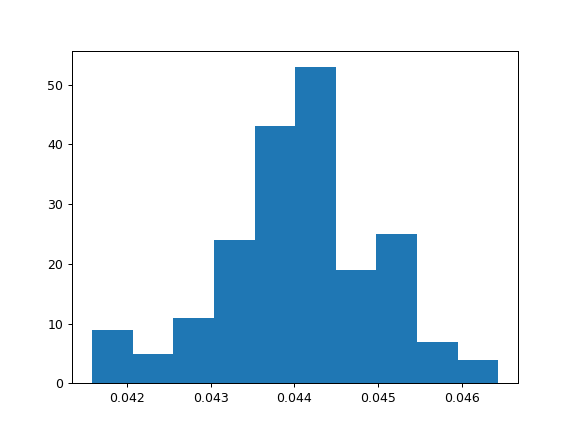


95.0 confidence interval 0.0418777718747093 and 0.04577434899642878


In [54]:
%matplotlib notebook
# import libraries
import pandas
import numpy
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

# load dataset
x = std_based_ms2
x = norm_std_based_ms2
# configure bootstrap
n_iterations = 200 # here k=no. of bootstrapped samples
n_size = int(len(x))

# run bootstrap
medians = list()
for i in range(n_iterations):
    s = resample(x, n_samples=n_size)
    m = numpy.median(s);
    medians.append(m)

# plot scores
plt.hist(medians)
plt.show()

# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = numpy.percentile(medians, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = numpy.percentile(medians, p)

print(f"\n{alpha*100} confidence interval {lower} and {upper}")




In [18]:

# import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
  
# create random data
np.random.seed(0)
x = std_based_ms2
y = x+np.random.normal(0, 1, 10)
  
# create regression plot
ax = sns.regplot(x, y, ci=80)

ValueError: operands could not be broadcast together with shapes (477,) (10,) 

In [20]:
import numpy as np
import scipy.stats as st

#define sample data
data = std_based_ms2

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 



(7.43269141644195, 7.9067858286303005)

In [62]:
np.percentile(std_based_ms2,50)


from scipy import stats
x = std_based_ms2
print(x.std())

median = np.median(x)
mad =stats.median_absolute_deviation(x)


2.631991926656484


In [53]:
norm_std_based_ms2 = std_based_ms2/ np.linalg.norm(std_based_ms2)

norm_std_based_ms2

array([0.03510831, 0.03932754, 0.03903086, 0.03396722, 0.03579296,
       0.03678742, 0.03162138, 0.04354734, 0.03966477, 0.04438004,
       0.04940528, 0.04686689, 0.04838246, 0.03800541, 0.04163699,
       0.04436329, 0.04577408, 0.06156549, 0.05996987, 0.05656733,
       0.0458808 , 0.04636838, 0.04119575, 0.04494861, 0.03402345,
       0.04669536, 0.03881684, 0.03710899, 0.04228173, 0.04005758,
       0.04492792, 0.0344355 , 0.03298209, 0.02912889, 0.02698277,
       0.03270906, 0.03500386, 0.03423583, 0.03601629, 0.03398138,
       0.02924183, 0.04364021, 0.02510298, 0.02514122, 0.02673254,
       0.0300758 , 0.02907154, 0.02735117, 0.03020054, 0.03373133,
       0.03427965, 0.03365882, 0.03333267, 0.04294807, 0.03521946,
       0.03601944, 0.03557926, 0.04420794, 0.04600862, 0.04574915,
       0.04316974, 0.03952545, 0.04378038, 0.0441656 , 0.02922166,
       0.02792333, 0.03853682, 0.04681017, 0.03983164, 0.04198464,
       0.04336754, 0.04564113, 0.04244413, 0.04578475, 0.04618

In [49]:
np.std(std_based_ms2)


np.mean(std_based_ms2)

np.mean(std_based_ms2) - 2*np.std(std_based_ms2)

2.405754769223157

In [38]:
import scipy
iqr = scipy.stats.iqr(std_based_ms2)
iqr

q1 = np.percentile(std_based_ms2, 25)

q1

q1-1.5*iqr

0.14714580178936654

In [30]:
np.min(std_based_ms2)

#np.percentile(std_based_ms2,0.05)

1.709986416735295

In [31]:
np.percentile(std_based_ms2,25) - iqr 

#np.median(lac_based_ms2)

2.0451217489671354

In [32]:
combined_df.to_excel(data_folder + os.sep+'combined_analysis_control_17_1208.xlsx', index=False)

In [38]:


#combined_df

In [34]:
filtered_df = combined_df.loc[:,range(-20,50)]


<IPython.core.display.Javascript object>


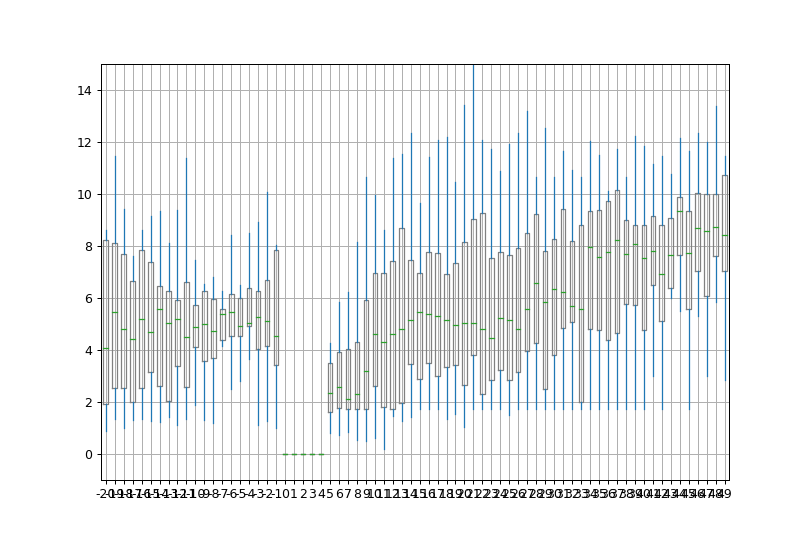

c:\programdata\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


(-1, 15)

In [35]:
%matplotlib notebook

fig, ax = plt.subplots(figsize=(9, 6))



boxprops = dict(linestyle='-', linewidth=1, color='gray')

medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')


meanprops = dict(linestyle='--', linewidth=5.5, color='purple')


filtered_df.boxplot(grid =True,
                    notch = False,
                    showcaps=False,
                    showfliers=False,
                    
                   #showbox =False
                    boxprops =boxprops,
                    meanprops= meanprops,
    
                   )


ax.set_ylim([-1, 15])

In [36]:
len(filtered_df)

23

In [37]:
print(len(control_files))
print(len(filtered_df))

cellname_list =[]

for _f in control_files:

    cellname = _f.split('\\')[-1].split('.xlsx')[0]
    
    cellname_list.append(cellname)
    
cellname_list    


lines = cellname_list    
with open(data_folder + os.sep + 'all_control_17_list_1208.txt', 'w') as f:
    for line in lines:
        f.write(line)
        f.write('\n')

23
23
